In [1]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# SEIR do artigo "First-order phase transitions in outbreaks of co-infectious diseases and the extended general epidemic process".

In [7]:
# SEIR - diagrama de fases;

def seir(t, y, alpha, beta, gamma):
    s, e, i, r = y
    dsdt = - beta * s * i - alpha * s * i
    dedt = alpha * s * i - alpha * e * i
    didt = beta * s * i + alpha * e * i - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt

norm = 1e-4

eixo_alpha = 30
alpha_add = 0.1

eixo_beta = 40
beta_add = 0.1

alpha = 0.1
beta = 0.1
gamma = 1


i0 = 1.5e-6 #!!!!!!!
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0 

listaA = []
listaB_l = []
listaR_l = []


for i in range(eixo_alpha):

    listaR = []
    listaB = []
    
    betA = beta 
    
    for j in range(eixo_beta):
        
        si = s0
        ei = e0
        ii = i0
        ri = r0
        
        t0, t = 1, 1000
        
        a, b = [1, 2]
        
        while np.isclose( a, b, atol=norm) == False:
              
            res = solve_ivp(seir, (t0, t), args=(alpha, betA, gamma), y0=[si, ei, ii, ri], method='Radau') # DOP853, BDF, Radau

            si = res.y[0][-1]
            ei = res.y[1][-1]
            ii = res.y[2][-1]
            ri = res.y[3][-1]

            a = res.y[3][-1]
            b = res.y[3][-2]

            t0 = t
            t += 1

        listaR.append(ri)
        listaB.append(betA)
        
        betA += beta_add
    
    listaR_l.append(listaR)
    listaB_l.append(listaB)
    
    listaA.append(alpha)
    
    alpha += alpha_add


Text(0.5, 1.0, '"Modelo do artigo: First-order phase transitions...; Gamma = 1; i0 = 1.5e-06')

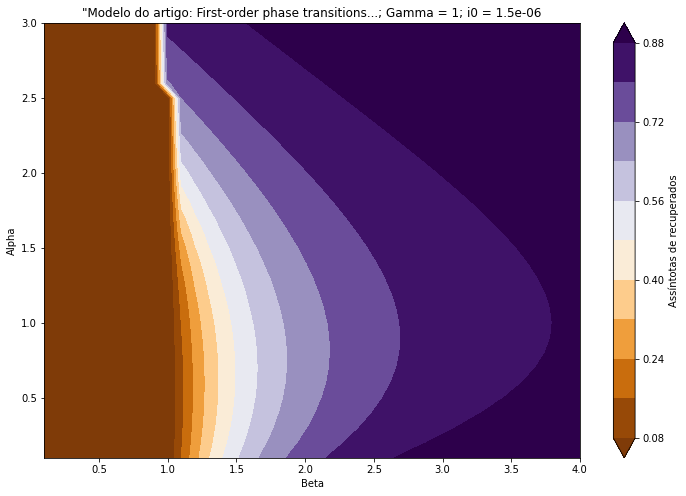

In [8]:
# Gráfico.

X, Y = np.meshgrid(listaB_l[0], listaA)

fig, ax = plt.subplots(figsize=(12,8))
img = ax.contourf(X,Y,listaR_l, 13, cmap='PuOr', extend='both') # hatches=['-', '/', '\\', '//']
fig.colorbar(img, orientation='vertical', label='Assíntotas de recuperados') # shrink=0.7
#ax.clabel(img,fontsize=13)
ax.set_ylabel('Alpha')
ax.set_xlabel('Beta')
#ax.set_yticks([1,2,3,4,5,6,7,8,9])
#ax.set_xticks([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75])
ax.set_title(f'"Modelo do artigo: First-order phase transitions...; Gamma = {gamma}; i0 = {i0}')

In [3]:
# SEIR - diagrama de fases - DELTA.

def seir(t, y, alpha, beta, gamma, delta):
    s, e, i, r = y
    dsdt = - beta * s * i - delta * s * i
    dedt = delta * s * i - alpha * e * i
    didt = beta * s * i + alpha * e * i - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt

norm = 1e-4

eixo_alpha = 10
eixo_beta = 10

alpha = 0.1
beta = 0.1
gamma = 1
delta = 10

alpha_add = 1
beta_add = 0.2
delta_add = 1

i0 = 1e-3 #!!!!!!!
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0 

listaA = []
listaB_l = []
listaR_l = []


for i in range(eixo_alpha):

    listaR = []
    listaB = []
    
    betA = beta
    deltA = delta
    
    for j in range(eixo_beta):
        
        si = s0
        ei = e0
        ii = i0
        ri = r0
        
        t0, t = 1, 1000
        
        a, b = [1, 2]
        
        while np.isclose( a, b, atol=norm) == False:
              
            res = solve_ivp(seir, (t0, t), args=(alpha, betA, gamma, deltA), y0=[si, ei, ii, ri], method='Radau') # DOP853, BDF, Radau

            si = res.y[0][-1]
            ei = res.y[1][-1]
            ii = res.y[2][-1]
            ri = res.y[3][-1]

            a = res.y[3][-1]
            b = res.y[3][-2]

            t0 = t
            t += 1

        listaR.append(ri)
        listaB.append(betA)
        
        betA += beta_add
        deltA = betA + delta_add
        
    listaR_l.append(listaR)
    listaB_l.append(listaB)
    
    listaA.append(alpha)
    
    alpha += alpha_add


Text(0.5, 1.0, 'Diagrama de fases do modelo SEIR; Gamma = 1; i0 = 0.001; Delta = 10')

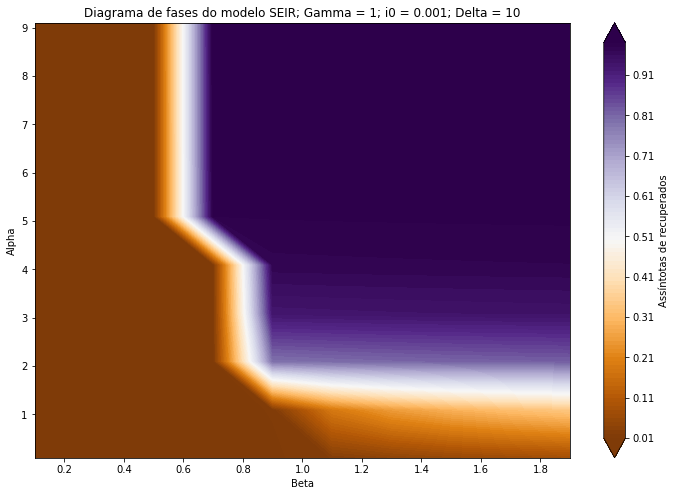

In [4]:
# Gráfico.

X, Y = np.meshgrid(listaB_l[0], listaA)

fig, ax = plt.subplots(figsize=(12,8))
img = ax.contourf(X,Y,listaR_l, 100, cmap='PuOr', extend='both') # hatches=['-', '/', '\\', '//']
fig.colorbar(img, orientation='vertical', label='Assíntotas de recuperados') # shrink=0.7
#ax.clabel(img,fontsize=13)
ax.set_ylabel('Alpha')
ax.set_xlabel('Beta')
#ax.set_yticks([1,2,3,4,5,6,7,8,9])
#ax.set_xticks([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75])
ax.set_title(f'Diagrama de fases do modelo SEIR; Gamma = {gamma}; i0 = {i0}; Delta = {delta}')

# SEIR da página da wikipédia: "Compartmental models in epidemiology".

In [3]:
# SEIR - diagrama de fases;

def seir(t, y, alpha, beta, gamma):
    s, e, i, r = y
    dsdt = -beta * s * i
    dedt = beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt

norm = 1e-4

eixo_alpha = 30
alpha_add = 0.1

eixo_beta = 40
beta_add = 0.1

alpha = 0.1
beta = 0.1
gamma = 1


i0 = 1.5e-6 #!!!!!!!
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0 

listaA = []
listaB_l = []
listaR_l = []


for i in range(eixo_alpha):

    listaR = []
    listaB = []
    
    betA = beta 
    
    for j in range(eixo_beta):
        
        si = s0
        ei = e0
        ii = i0
        ri = r0
        
        t0, t = 1, 1000
        
        a, b = [1, 2]
        
        while np.isclose( a, b, atol=norm) == False:
              
            res = solve_ivp(seir, (t0, t), args=(alpha, betA, gamma), y0=[si, ei, ii, ri], method='Radau') # DOP853, BDF, Radau

            si = res.y[0][-1]
            ei = res.y[1][-1]
            ii = res.y[2][-1]
            ri = res.y[3][-1]

            a = res.y[3][-1]
            b = res.y[3][-2]

            t0 = t
            t += 1

        listaR.append(ri)
        listaB.append(betA)
        
        betA += beta_add
    
    listaR_l.append(listaR)
    listaB_l.append(listaB)
    
    listaA.append(alpha)
    
    alpha += alpha_add


Text(0.5, 1.0, 'Modelo SEIR. α versus R0.')

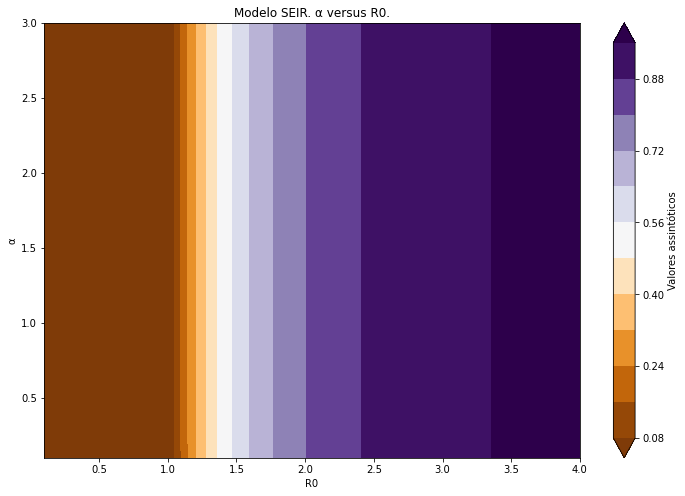

In [8]:
#Gráfico.

X, Y = np.meshgrid(listaB_l[0], listaA)

fig, ax = plt.subplots(figsize=(12,8))
img = ax.contourf(X,Y,listaR_l, 13, cmap='PuOr', extend='both') # hatches=['-', '/', '\\', '//']
fig.colorbar(img, orientation='vertical', label='Valores assintóticos') # shrink=0.7
#ax.clabel(img,fontsize=13)
ax.set_ylabel('α')
ax.set_xlabel('R0')
#ax.set_yticks([1,2,3,4,5,6,7,8,9])
#ax.set_xticks([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75])
ax.set_title(f'Modelo SEIR. α versus R0.')

# Outros

Text(0.5, 1.0, 'Curvas SEIR contra o tempo')

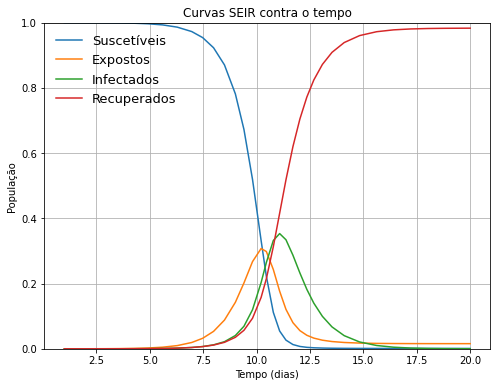

In [16]:
# SEIR - dinâmica;

def seir(t, y, alpha, beta, gamma):
    s, e, i, r = y
    dsdt = - beta * s * i - alpha * s * i
    dedt = alpha * s * i - alpha * e * i
    didt = beta * s * i + alpha * e * i - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt

beta = 2
gamma = 1
alpha = 5
i0 = 1e-5
t0, t = 1, 20

e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0

res = solve_ivp(seir, (t0, t), args=(alpha, beta, gamma), y0=[s0, e0, i0, r0], method='Radau') # DOP853, BDF, Radau

fig, axes = plt.subplots(figsize=(8,6))

axes.plot(res.t, res.y[0], label='Suscetíveis')
axes.plot(res.t, res.y[1], label='Expostos')
axes.plot(res.t, res.y[2], label='Infectados')
axes.plot(res.t, res.y[3], label='Recuperados')

axes.set_xlabel('Tempo (dias)')
axes.set_ylabel('População')
axes.set_title("R0 = %.f" % (beta/gamma))
axes.set_ylim(0,1)
axes.legend(frameon=False, fontsize=13)
axes.grid(True)
axes.set_title('Curvas SEIR contra o tempo', fontsize=12)


Text(0, 0.5, 'Recuperados')

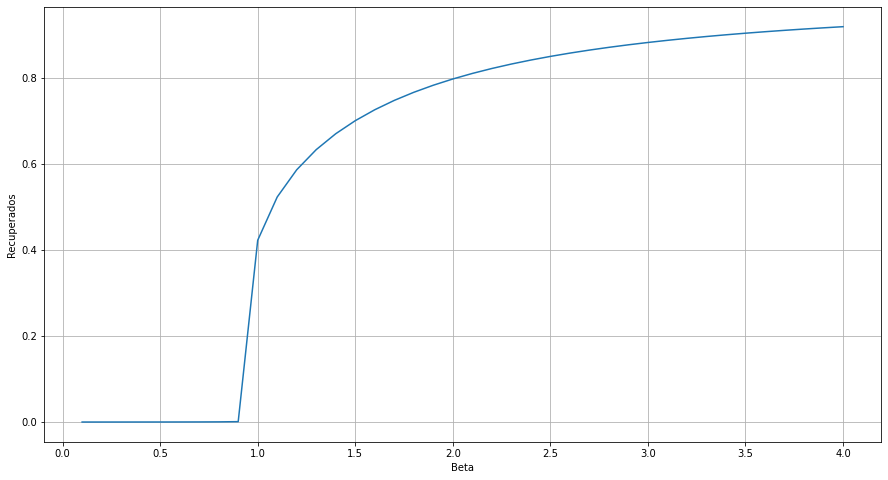

In [44]:
# SEIR - diagrama de fases;

def seir(t, y, alpha, beta, gamma):
    s, e, i, r = y
    dsdt = - beta * s * i - alpha * s * i
    dedt = alpha * s * i - alpha * e * i
    didt = beta * s * i + alpha * e * i - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt

norm = 1e-4

eixo_beta = 40
beta_add = 0.1

alpha = 2
beta = 0.1
gamma = 1

i0 = 1e-4 #!!!!!!!
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0 

listaB = []
listaR = []

for j in range(eixo_beta):

    si = s0
    ei = e0
    ii = i0
    ri = r0

    t0, t = 1, 1000

    a, b = [1, 2]

    while np.isclose( a, b, atol=norm) == False:

        res = solve_ivp(seir, (t0, t), args=(alpha, beta, gamma), y0=[si, ei, ii, ri], method='Radau') # DOP853, BDF, Radau

        si = res.y[0][-1]
        ei = res.y[1][-1]
        ii = res.y[2][-1]
        ri = res.y[3][-1]

        a = res.y[3][-1]
        b = res.y[3][-2]

        t0 = t
        t += 1

    listaR.append(ri)
    listaB.append(beta)

    beta += beta_add

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(listaB, listaR)
ax.grid(True)
ax.set_xlabel('Beta')
ax.set_ylabel('Recuperados')

Text(0.5, 1.0, '"Modelo do artigo: First-order phase transitions...; Gamma = 1; i0 = 1.5e-06')

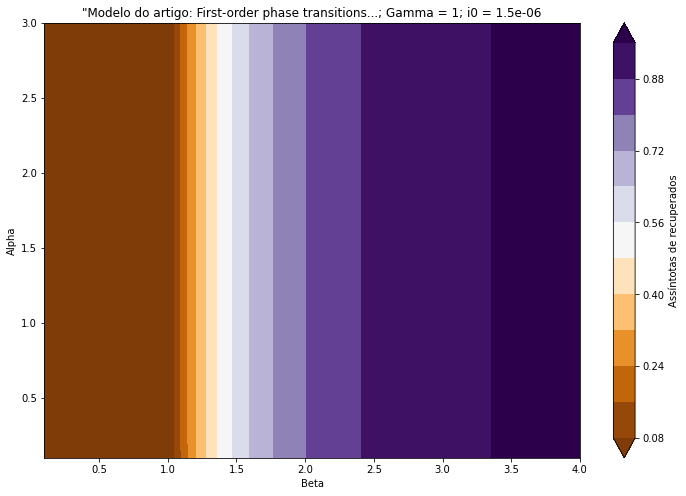

In [6]:
# SEIR - diagrama de fases;

def seir(t, y, alpha, beta, gamma):
    s, e, i, r = y
    dsdt = - beta * s * i
    dedt = beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt

norm = 1e-4

eixo_alpha = 30
alpha_add = 0.1

eixo_beta = 40
beta_add = 0.1

alpha = 0.1
beta = 0.1
gamma = 1


i0 = 1.5e-6 #!!!!!!!
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0 

listaA = []
listaB_l = []
listaR_l = []


for i in range(eixo_alpha):

    listaR = []
    listaB = []
    
    betA = beta 
    
    for j in range(eixo_beta):
        
        si = s0
        ei = e0
        ii = i0
        ri = r0
        
        t0, t = 1, 1000
        
        a, b = [1, 2]
        
        while np.isclose( a, b, atol=norm) == False:
              
            res = solve_ivp(seir, (t0, t), args=(alpha, betA, gamma), y0=[si, ei, ii, ri], method='Radau') # DOP853, BDF, Radau

            si = res.y[0][-1]
            ei = res.y[1][-1]
            ii = res.y[2][-1]
            ri = res.y[3][-1]

            a = res.y[3][-1]
            b = res.y[3][-2]

            t0 = t
            t += 1

        listaR.append(ri)
        listaB.append(betA)
        
        betA += beta_add
    
    listaR_l.append(listaR)
    listaB_l.append(listaB)
    
    listaA.append(alpha)
    
    alpha += alpha_add
    
# Gráfico.

X, Y = np.meshgrid(listaB_l[0], listaA)

fig, ax = plt.subplots(figsize=(12,8))
img = ax.contourf(X,Y,listaR_l, 13, cmap='PuOr', extend='both') # hatches=['-', '/', '\\', '//']
fig.colorbar(img, orientation='vertical', label='Assíntotas de recuperados') # shrink=0.7
#ax.clabel(img,fontsize=13)
ax.set_ylabel('Alpha')
ax.set_xlabel('Beta')
#ax.set_yticks([1,2,3,4,5,6,7,8,9])
#ax.set_xticks([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75])
ax.set_title(f'"Modelo do artigo: First-order phase transitions...; Gamma = {gamma}; i0 = {i0}')